<a href="https://colab.research.google.com/github/safdarjung/projects/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Using API from kaggle to download large dataset as a zip file **

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


#extracting the zip **file**

In [ ]:
import zipfile
zip_data = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_data.extractall('/content')
zip_data.close()

In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import BatchNormalization,Dropout

In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
#to check resolution/feature_array/feature_map/pixel_values of the image
# all images have different resolutions
img= cv2.imread('/content/test/dogs/dog.10010.jpg')
# img

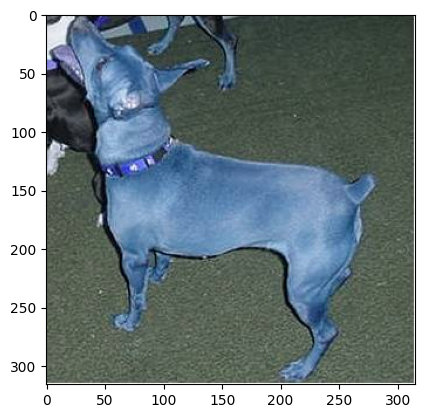

In [ ]:
# to show the image
plt.imshow(img)

In [ ]:
img.shape

(316, 315, 3)

In [ ]:
# Generators are used to make train and test directories. Train test split not used

#creating training dirctory
train_ds=tf.keras.utils.image_dataset_from_directory(

    directory='/content/train',
    labels = 'inferred',   #use the already given labels
    label_mode= 'int',      # mode is int bcoz it is a classification model,
                            #encoding the cat and dog as 0 and 1 resp
    batch_size=32,           #defining batch for each iteration
    image_size=(256,256)
)

#creating testing dirctory
test_ds=tf.keras.utils.image_dataset_from_directory(

    directory='/content/test',
    labels = 'inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalising/Scaling the data

def scale_datapx(image,label):
  image=tf.cast(image//255,tf.float32)   # (data,datatype)
  return image,label

train_ds=train_ds.map(scale_datapx)
test_ds=test_ds.map(scale_datapx)

# model building CNN

-Data augmentation - making multiple images using a single image.It helps in increasing the accuracy of the model.We provide the model with images with different variations like tilted,brightness,zooming,contrast,saturation,cropping,flipping,zooming,etc.
-increse the the data
-more data high accuracy
-l1 and l2 regularisation
-batch regularisation
-drop out layer

In [ ]:
# each layer finds the most important featues. The no. of features reduce after each layer

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:

# binary_crossentropy for binary classification
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
history=model.fit(train_ds,validation_data=test_ds,epochs=10)

Epoch 1/10
625/625 [==============================] - 71s 106ms/step - loss: 1.6200 - accuracy: 0.5171 - val_loss: 0.6908 - val_accuracy: 0.5224
Epoch 2/10
625/625 [==============================] - 64s 103ms/step - loss: 0.6980 - accuracy: 0.5362 - val_loss: 0.6953 - val_accuracy: 0.5090
Epoch 3/10
625/625 [==============================] - 64s 101ms/step - loss: 0.6896 - accuracy: 0.5518 - val_loss: 0.6868 - val_accuracy: 0.5234
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.6848 - accuracy: 0.5699 - val_loss: 0.6888 - val_accuracy: 0.5164
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6692 - accuracy: 0.5834 - val_loss: 0.6922 - val_accuracy: 0.5036
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.6485 - accuracy: 0.6113 - val_loss: 0.8226 - val_accuracy: 0.5210
Epoch 7/10
625/625 [==============================] - 62s 99ms/step - loss: 0.6101 - accuracy: 0.6482 - val_loss: 0.9102 - val_acc

# Training accuracy graph


If the training accuracy is significantly higher than the test/validation accuracy, and the gap between them is increasing, you have an overfitting problem.
If both training and test/validation accuracy are low, it might indicate an underfitting problem.





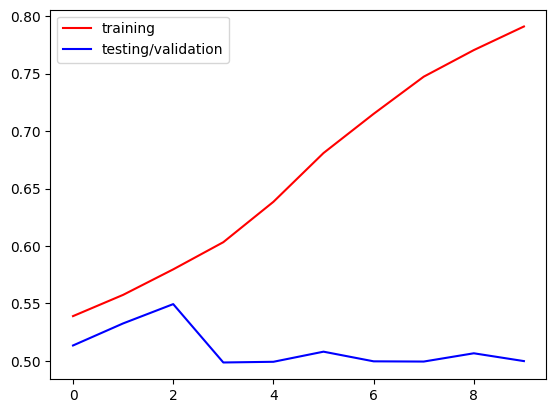

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='training')
plt.plot(history.history['val_accuracy'],color='blue',label='testing/validation')
plt.legend()      #for showing the labels
plt.show()

# Loss Graph

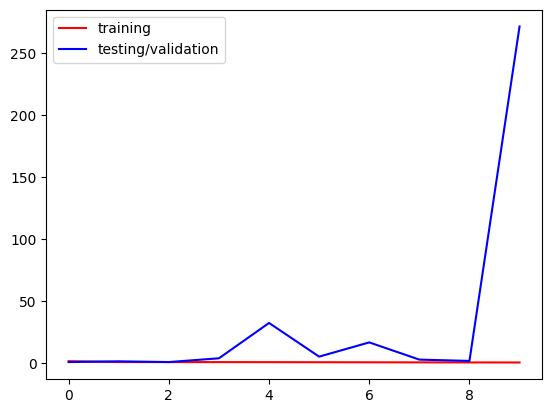

In [ ]:
plt.plot(history.history['loss'],color='red',label='training')
plt.plot(history.history['val_loss'],color='blue',label='testing/validation')
plt.legend()      #for showing the labels
plt.show()

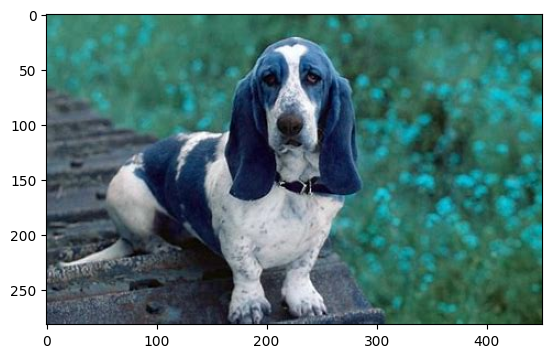

In [ ]:
test_img=cv2.imread('/content/download.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(282, 451, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_input=test_img.reshape(1,256,256,3)

In [ ]:
output=model.predict(test_input)[0][0]

1/1 [==============================] - 0s 179ms/step


In [ ]:
if output<0.5:
  print('cat')
else:
  print('dog')

cat
